## Global and Local Umaps

- GMM doesn't cluster well at all

In [30]:
from PIL import Image
import hdbscan
import time
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
from umap import UMAP
from image_helpers import *
from image_helpers import _square_sizer
from tsne import image_scatter_plot
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
data, paths, encodings, arrays_rescaled, X = load_encodings('../data/tinder_pics_dislikes_faces_firsts_deduped_encodings.pickle')
paths, encodings, arrays_rescaled, X = append_new_dataset(paths, encodings, arrays_rescaled, X,'../data/tinder_pics_likes_faces_deduped_firsts_encodings.pickle')
num_of_likes = len(paths) - len(data)
paths, encodings, arrays_rescaled, X = append_new_dataset(paths, encodings, arrays_rescaled, X,'../data/friends_and_myself_pics_faces_encodings.pickle')
num_of_friends = len(paths) - num_of_likes - len(data)



743 743 743 743
759 759 759 759


In [91]:
!ls ../data/*.pickle

../data/AF_ALL_faces_encodings.pickle
../data/AM_ALL_faces_encodings.pickle
../data/CF_ALL_encodings.pickle
../data/CF_ALL_faces_encodings.pickle
../data/CM_ALL_faces_encodings.pickle
../data/encodings.pickle
../data/encodings_likes.pickle
../data/friends.pickle
../data/friends_and_myself_pics_faces_encodings.pickle
../data/friends_pics_male_faces_encodings.pickle
../data/test_encodings.pickle
../data/tinder_pics_2017_deduped_firsts_faces_encodings.pickle
../data/tinder_pics_dislikes_faces_firsts_deduped_encodings.pickle
../data/tinder_pics_likes_faces_deduped_firsts_encodings.pickle


In [32]:
params = {
    #5 to 50, with a choice of 10 to 15 being a sensible default.
    "n_neighbors":50,

    #0.001 to 0.5, with 0.1 being a reasonable default.
    "min_dist":0.5,

    #metric: This determines the choice of metric used to measure distance in the input space. 
    "metric":'euclidean'
}



# Global and Local Umaps (respectively)

Doesn't tell too much of a different story from our initial runs though it does highlight faces which are on the virge of belonging to another cluster, lots of points on the bridge

/Users/ajay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


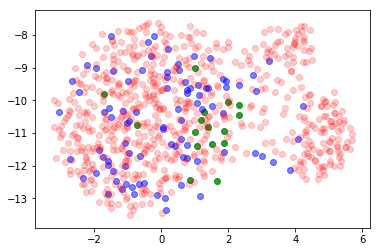

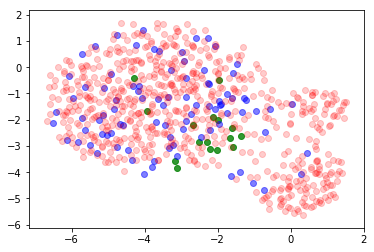

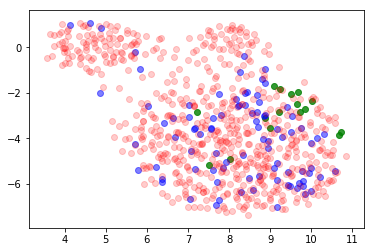

In [33]:
for _ in range(3):
    umap_embeddings = UMAP(**params).fit_transform(encodings)

    xx = umap_embeddings[:, 0]
    yy = umap_embeddings[:, 1]

    for x, y,in zip(xx[-num_of_friends:], yy[-num_of_friends:]): 
        plt.scatter(x, y, color='g', alpha=.8)

    for x, y,in zip(xx[-num_of_likes:-num_of_friends], yy[-num_of_likes:-num_of_friends]): 
        plt.scatter(x, y, color='b', alpha=0.5)

    for x, y in zip(xx[:-num_of_likes], yy[:-num_of_likes]): 
        plt.scatter(x, y, color='r', alpha=0.2)
    plt.show()


In [34]:
plot_data = image_scatter_plot(
                tsne_scatter_plot=umap_embeddings, 
                images=X, 
                res=5000
            )

print(plot_data.shape)
im = Image.fromarray(np.uint8(plot_data))
im.show()

(5128, 5938, 3)


In [35]:
params = {
    #5 to 50, with a choice of 10 to 15 being a sensible default.
    "n_neighbors":5,

    #0.001 to 0.5, with 0.1 being a reasonable default.
    "min_dist":0.001,

    #metric: This determines the choice of metric used to measure distance in the input space. 
    "metric":'euclidean'
}



/Users/ajay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


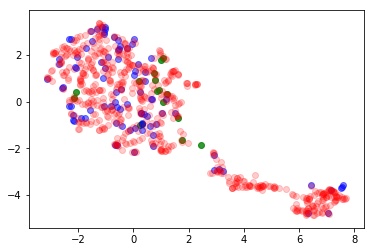

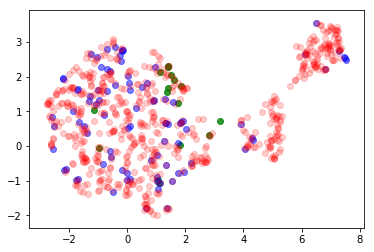

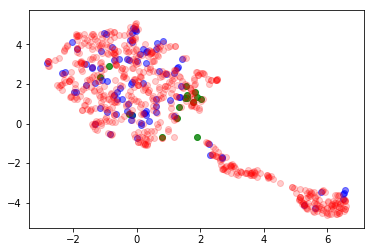

In [36]:
for _ in range(3):
    umap_embeddings = UMAP(**params).fit_transform(encodings)

    xx = umap_embeddings[:, 0]
    yy = umap_embeddings[:, 1]

    for x, y,in zip(xx[-num_of_friends:], yy[-num_of_friends:]): 
        plt.scatter(x, y, color='g', alpha=.8)

    for x, y,in zip(xx[-num_of_likes:-num_of_friends], yy[-num_of_likes:-num_of_friends]): 
        plt.scatter(x, y, color='b', alpha=0.5)

    for x, y in zip(xx[:-num_of_likes], yy[:-num_of_likes]): 
        plt.scatter(x, y, color='r', alpha=0.2)
    plt.show()


In [89]:
plot_data = image_scatter_plot(
                tsne_scatter_plot=umap_embeddings, 
                images=X, 
                res=5000
            )

print(plot_data.shape)
im = Image.fromarray(np.uint8(plot_data))
im.show()

(5128, 5274, 3)


## GMM's providing shit results

Well they don't agree the findings in Umap and I can't put a pattern to it's cluster choices

In [80]:
from sklearn.mixture import GaussianMixture

GMM = GaussianMixture(n_components=3, max_iter=5000, covariance_type='full')
gmm_labels = GMM.fit(encodings).predict(encodings)
pd.Series(gmm_labels).value_counts()

0    291
2    280
1    188
dtype: int64

# GMM doesn't cluster well

AIC or BIC doesn't show any minimums hence it doesn't cluster well - there isn't any "convergence"

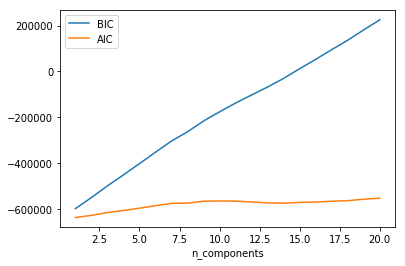

In [87]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(encodings)
          for n in n_components]

plt.plot(n_components, np.array([m.bic(np.array(encodings)) for m in models]), label='BIC')
plt.plot(n_components, np.array([m.aic(np.array(encodings)) for m in models]), label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

0


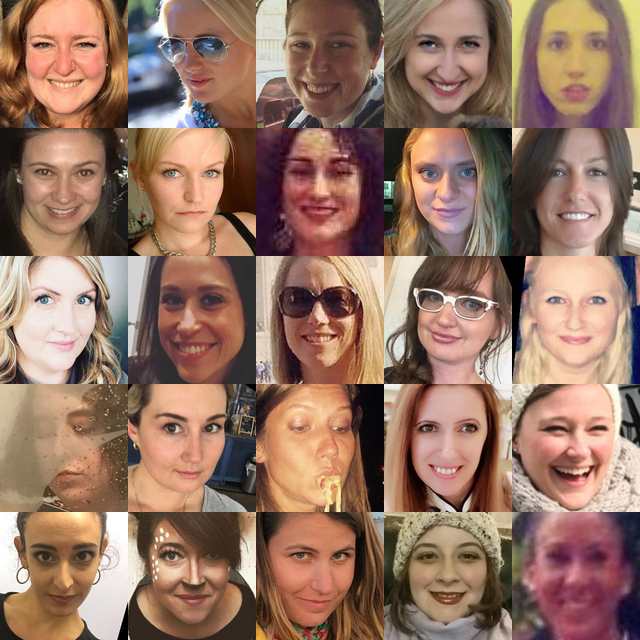

1


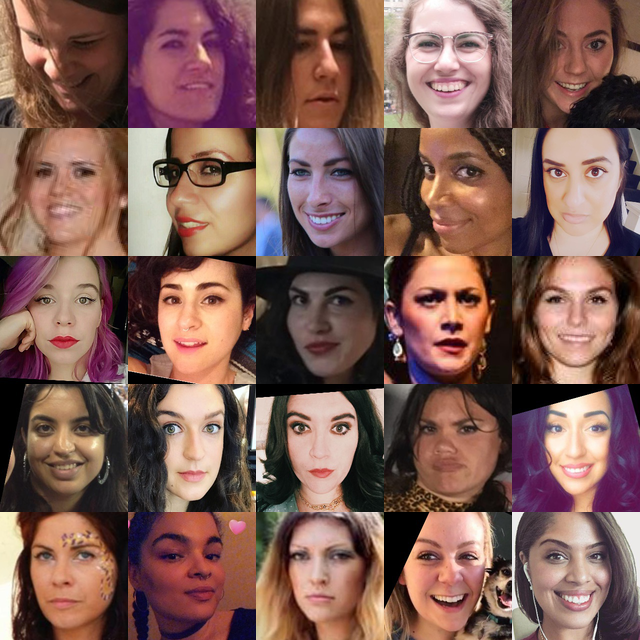

2


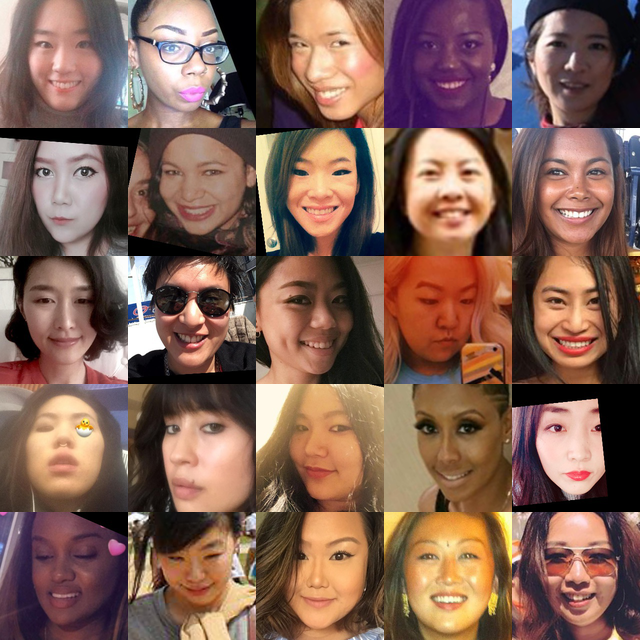

In [88]:
for cluster_idx in np.unique(gmm_labels):
    print(cluster_idx)
    args = np.where(preds== cluster_idx)[0]
    display(montagify([np.array(arrays_rescaled[arg]) for arg in args],
    (128,128), 
    tiles=(5,5)))
